In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('taxi.csv')

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
dups=df.duplicated()
df[dups]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [11]:
df['date_time_of_pickup'].value_counts()

2011-09-03 01:30:00 UTC    3
2014-05-30 23:38:00 UTC    3
2012-06-28 20:54:00 UTC    3
2011-02-11 13:19:00 UTC    3
2014-05-30 10:50:00 UTC    2
                          ..
2011-10-07 00:24:25 UTC    1
2015-04-02 06:47:05 UTC    1
2011-01-09 10:09:58 UTC    1
2012-10-27 18:11:00 UTC    1
2010-01-13 08:13:14 UTC    1
Name: date_time_of_pickup, Length: 49555, dtype: int64

In [12]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

In [13]:
df['month'] = df['date_time_of_pickup'].dt.month
df['year'] = df['date_time_of_pickup'].dt.year

In [14]:
df['Day_week'] = df['date_time_of_pickup'].dt.day_name()
df['hour'] = df['date_time_of_pickup'].dt.hour

In [15]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,year,Day_week,hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6,2009,Monday,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,2010,Tuesday,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8,2011,Thursday,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,Saturday,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3,2010,Tuesday,7


In [16]:
df.drop('unique_id', axis=1, inplace=True)

In [17]:
df.drop('date_time_of_pickup', axis=1, inplace=True)

In [18]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,year,Day_week,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,6,2009,Monday,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,2010,Tuesday,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,8,2011,Thursday,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,Saturday,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3,2010,Tuesday,7


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
month,50000.0,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
year,50000.0,2011.739260,1.862639,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
hour,50000.0,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000


<AxesSubplot:xlabel='amount'>

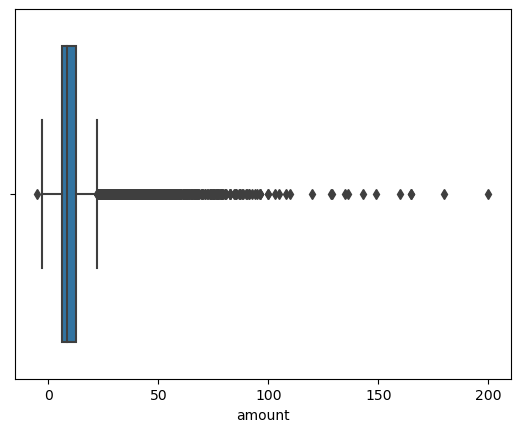

In [20]:
sns.boxplot(x='amount',data=df)

<AxesSubplot:xlabel='year', ylabel='amount'>

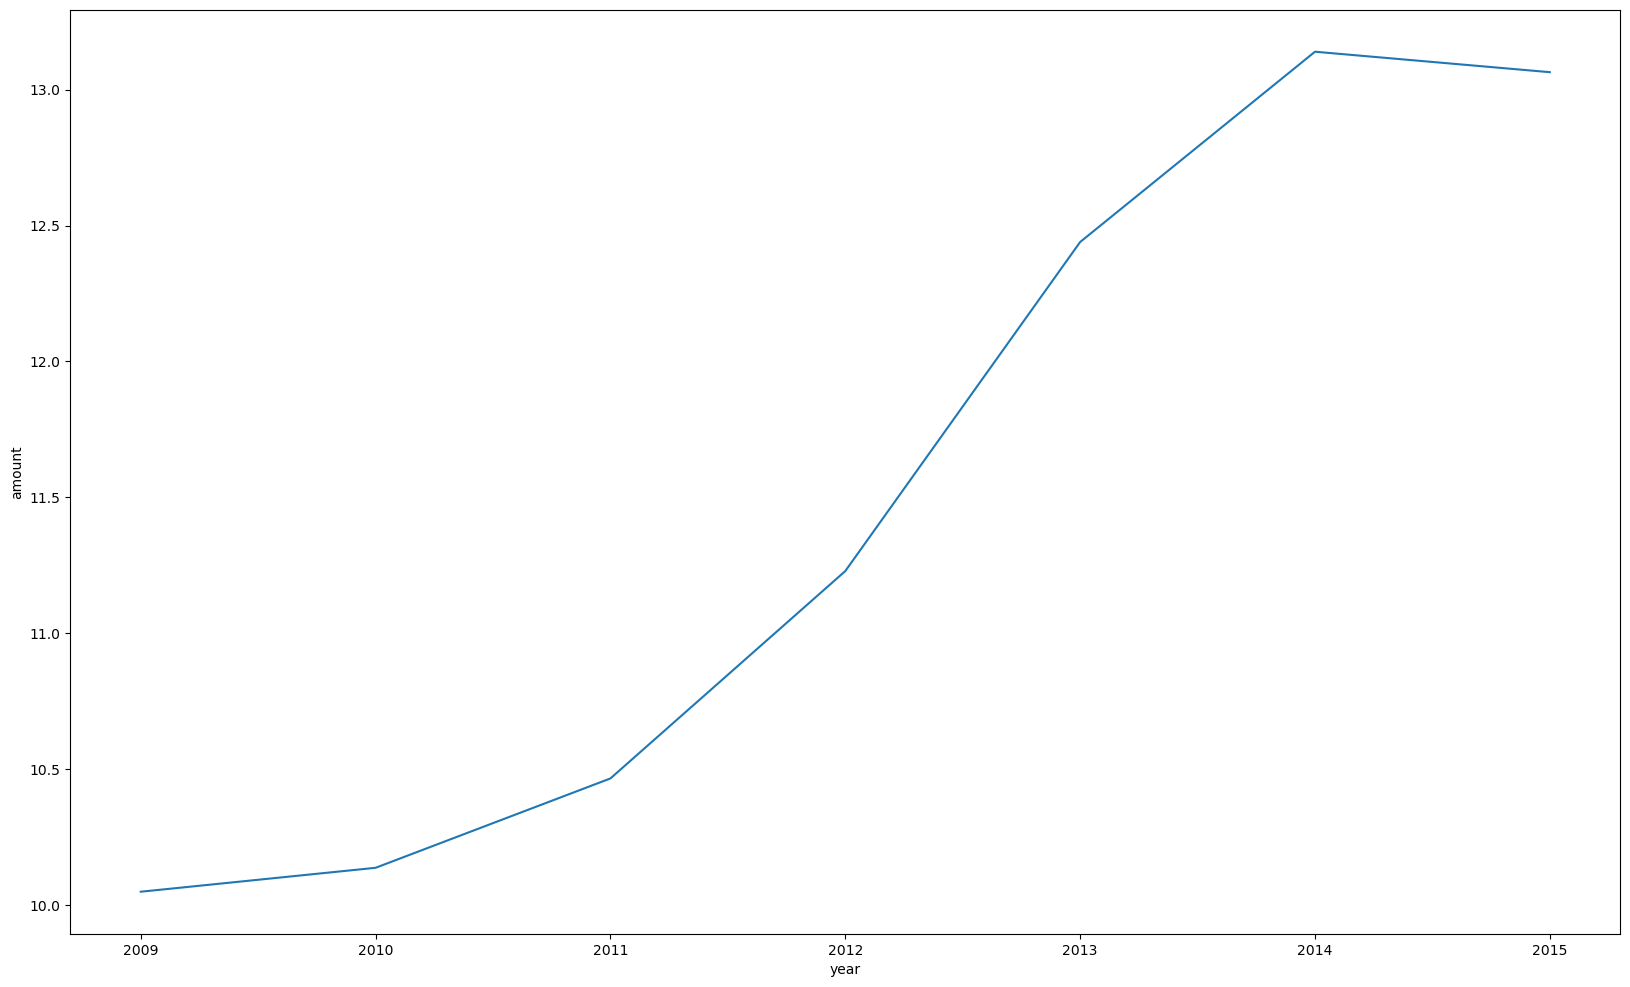

In [21]:
plt.figure(figsize=(20,12))
sns.lineplot(x='year', y='amount',data=df,ci=None)

<AxesSubplot:xlabel='year', ylabel='amount'>

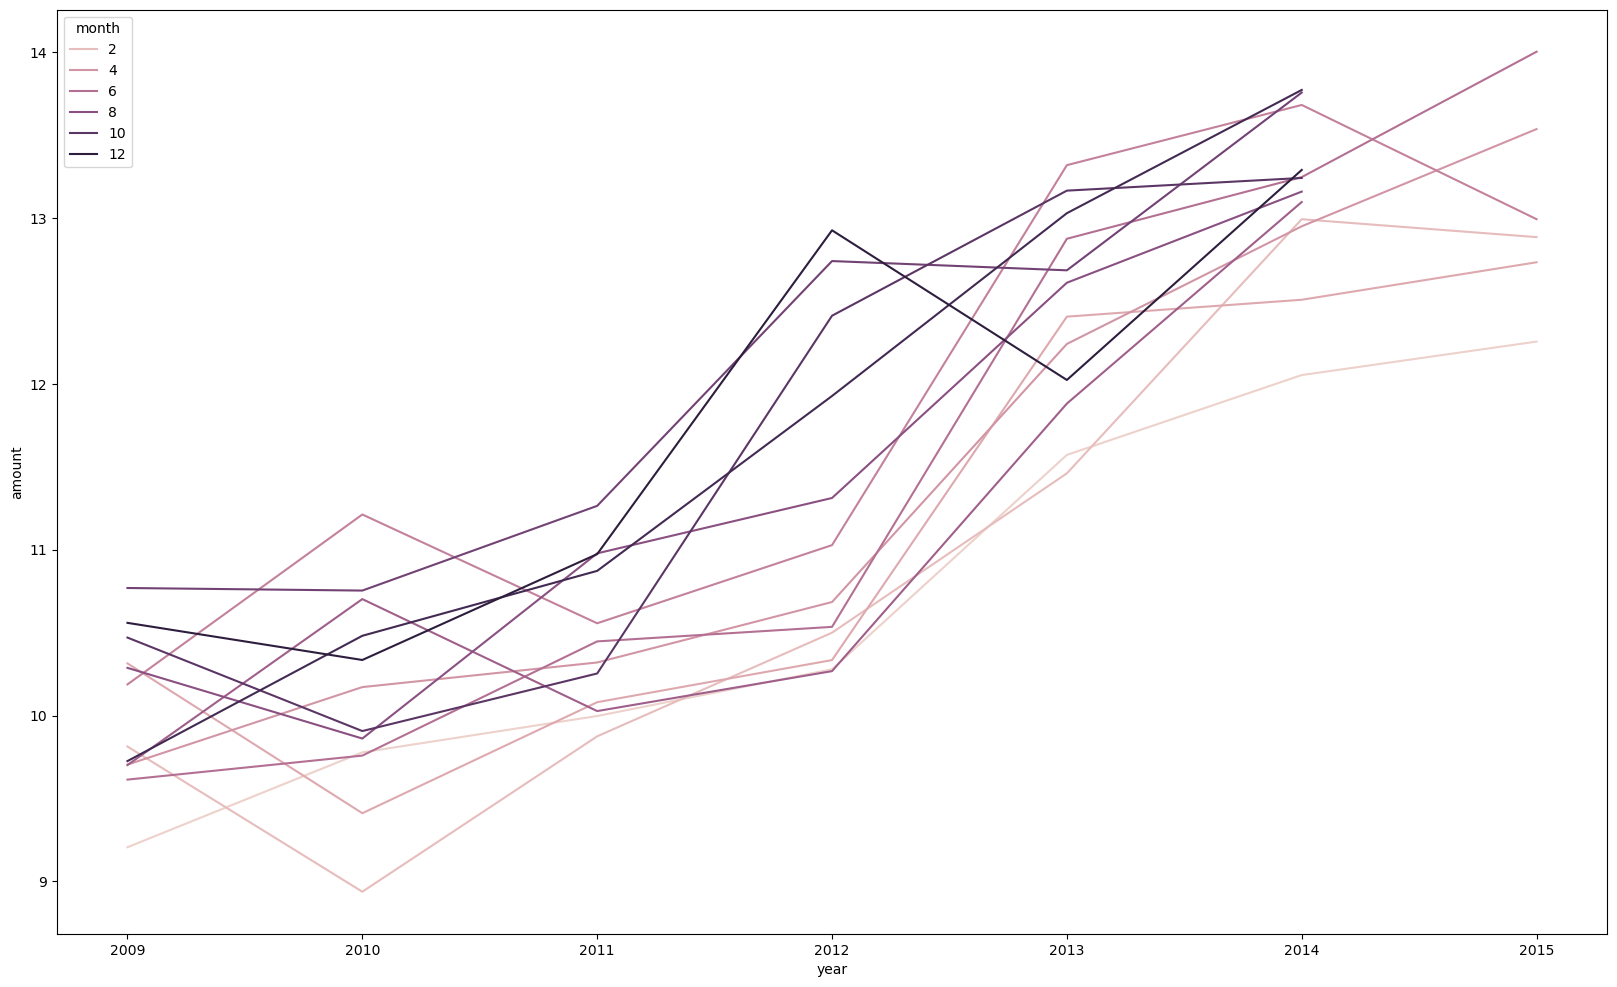

In [22]:
plt.figure(figsize=(20,12))
sns.lineplot(x='year', y='amount',data=df,ci=None,hue='month')

<AxesSubplot:xlabel='month', ylabel='amount'>

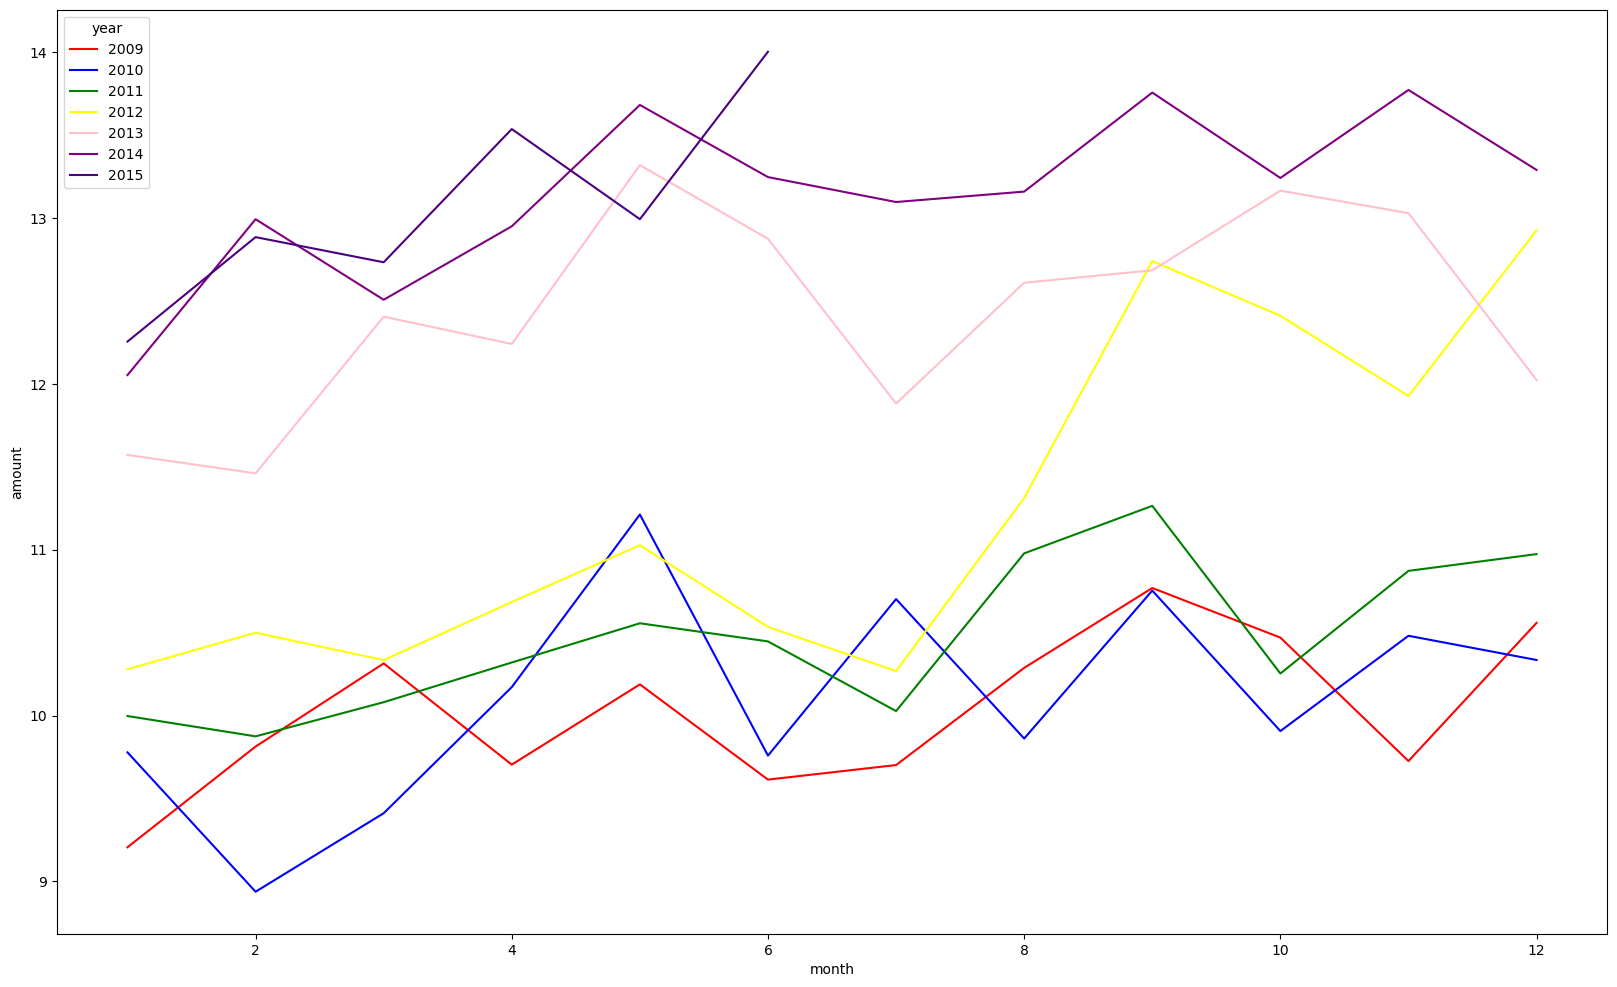

In [23]:
Color=['red','blue','green','yellow','pink','purple','indigo']
plt.figure(figsize=(20,12))
sns.lineplot(x='month', y='amount',data=df,ci=None,hue='year',palette=Color)

<AxesSubplot:xlabel='hour', ylabel='amount'>

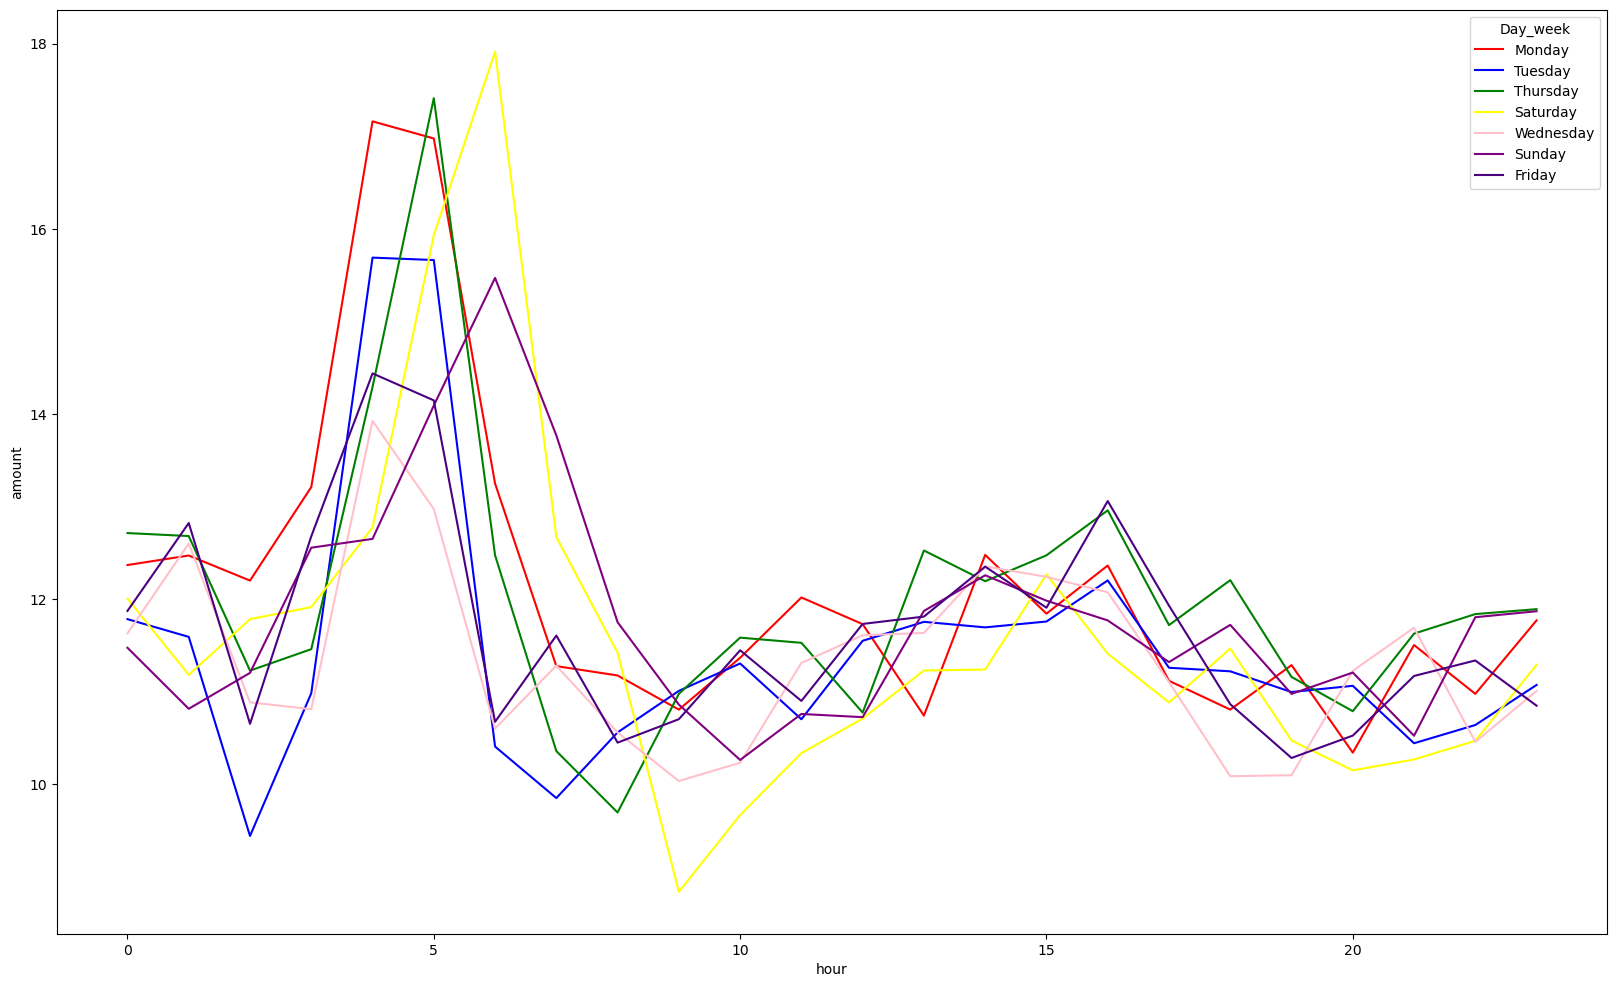

In [24]:
Color=['red','blue','green','yellow','pink','purple','indigo']
plt.figure(figsize=(20,12))
sns.lineplot(x='hour', y='amount',data=df,ci=None,hue='Day_week',palette=Color)

In [25]:
correlation= df.corr()
correlation

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,year,hour
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583,0.026876,0.120831,-0.022018
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604,0.000416,-0.001284,0.004910
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237,0.000711,-0.001334,-0.004606
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936,0.001407,-0.000250,0.005490
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958,-0.000422,-0.001888,-0.004515
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000,0.009175,0.006344,0.011350
month,0.026876,0.000416,0.000711,0.001407,-0.000422,0.009175,1.000000,-0.115742,-0.001950
year,0.120831,-0.001284,-0.001334,-0.000250,-0.001888,0.006344,-0.115742,1.000000,0.004104
hour,-0.022018,0.004910,-0.004606,0.005490,-0.004515,0.011350,-0.001950,0.004104,1.000000


<AxesSubplot:>

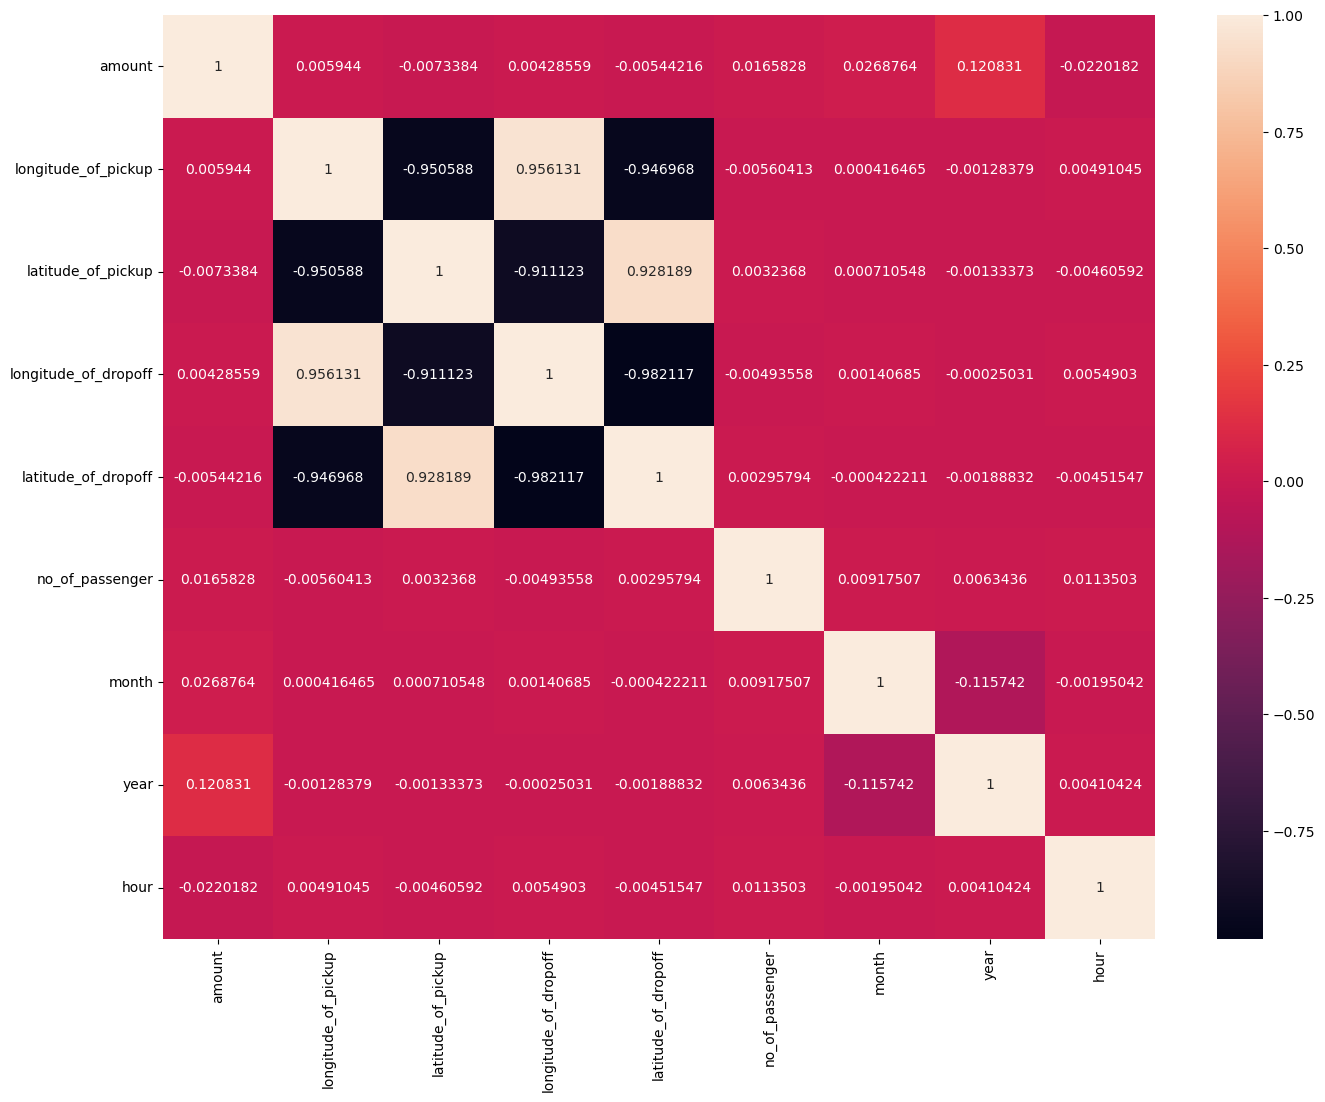

In [26]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation,annot=True,fmt='g')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   month                 50000 non-null  int64  
 7   year                  50000 non-null  int64  
 8   Day_week              50000 non-null  object 
 9   hour                  50000 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 5.2+ MB


In [28]:
X = df.drop("amount", axis=1)

y = df.pop("amount")

X.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,year,Day_week,hour
0,-73.844311,40.721319,-73.841610,40.712278,1,6,2009,Monday,17
1,-74.016048,40.711303,-73.979268,40.782004,1,1,2010,Tuesday,16
2,-73.982738,40.761270,-73.991242,40.750562,2,8,2011,Thursday,0
3,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,Saturday,4
4,-73.968095,40.768008,-73.956655,40.783762,1,3,2010,Tuesday,7


In [29]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: amount, dtype: float64

In [30]:
y.shape

(50000,)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [46]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [47]:
df['Day_week']=LE.fit_transform(df['Day_week'])

In [48]:
df.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,year,Day_week,hour
0,-73.844311,40.721319,-73.841610,40.712278,1,6,2009,1,17
1,-74.016048,40.711303,-73.979268,40.782004,1,1,2010,5,16
2,-73.982738,40.761270,-73.991242,40.750562,2,8,2011,4,0
3,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,2,4
4,-73.968095,40.768008,-73.956655,40.783762,1,3,2010,5,7


In [49]:
train_labels.value_counts(normalize=True)

6.50     0.050000
4.50     0.042286
8.50     0.038686
5.30     0.029657
5.70     0.028314
           ...   
34.54    0.000029
27.90    0.000029
80.75    0.000029
23.40    0.000029
54.50    0.000029
Name: amount, Length: 618, dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude_of_pickup   50000 non-null  float64
 1   latitude_of_pickup    50000 non-null  float64
 2   longitude_of_dropoff  50000 non-null  float64
 3   latitude_of_dropoff   50000 non-null  float64
 4   no_of_passenger       50000 non-null  int64  
 5   month                 50000 non-null  int64  
 6   year                  50000 non-null  int64  
 7   Day_week              50000 non-null  int64  
 8   hour                  50000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 4.8 MB


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
Rf_model=RandomForestRegressor()

In [53]:
Rf_model.fit(X_train,train_labels)

ValueError: could not convert string to float: 'Thursday'

<AxesSubplot:xlabel='no_of_passenger'>

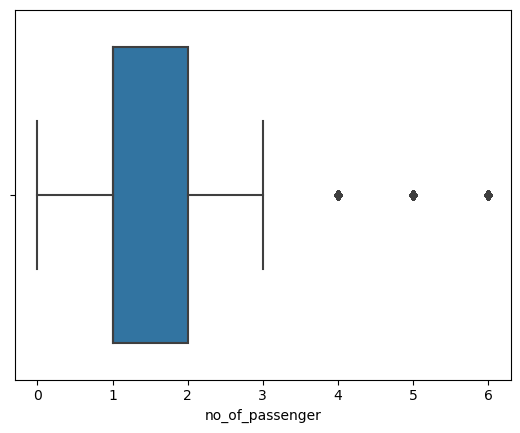

In [37]:
sns.boxplot(x='no_of_passenger',data=df)

<AxesSubplot:xlabel='longitude_of_pickup'>

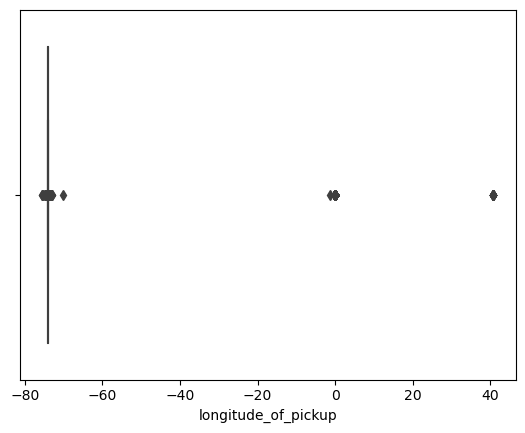

In [38]:
sns.boxplot(x='longitude_of_pickup',data=df)

<AxesSubplot:xlabel='latitude_of_pickup'>

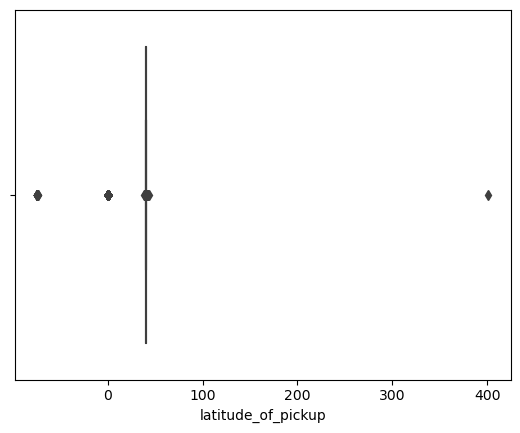

In [39]:
sns.boxplot(x='latitude_of_pickup',data=df)

In [40]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range